## To predict whether a person will have diabetes or not.

In [66]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")

In [67]:
## Load the data
data=pd.read_csv('diabetes.csv')

In [68]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Basic Checks 

In [69]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [70]:
data.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [71]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [73]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Domain Analysis.

### Exploratory Data Analysis

In [74]:
#Step 1 Univariate Analysis
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: xlabel='Pregnancies', ylabel='count'>

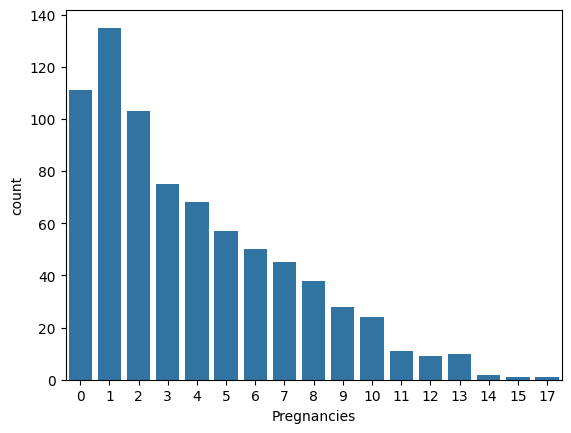

In [75]:
sns.countplot(x='Pregnancies',data=data)
# Maximum patients have conceived  1 and 0 times.

In [76]:
data.Pregnancies.value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

In [77]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [78]:
for column in data:
    print (column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


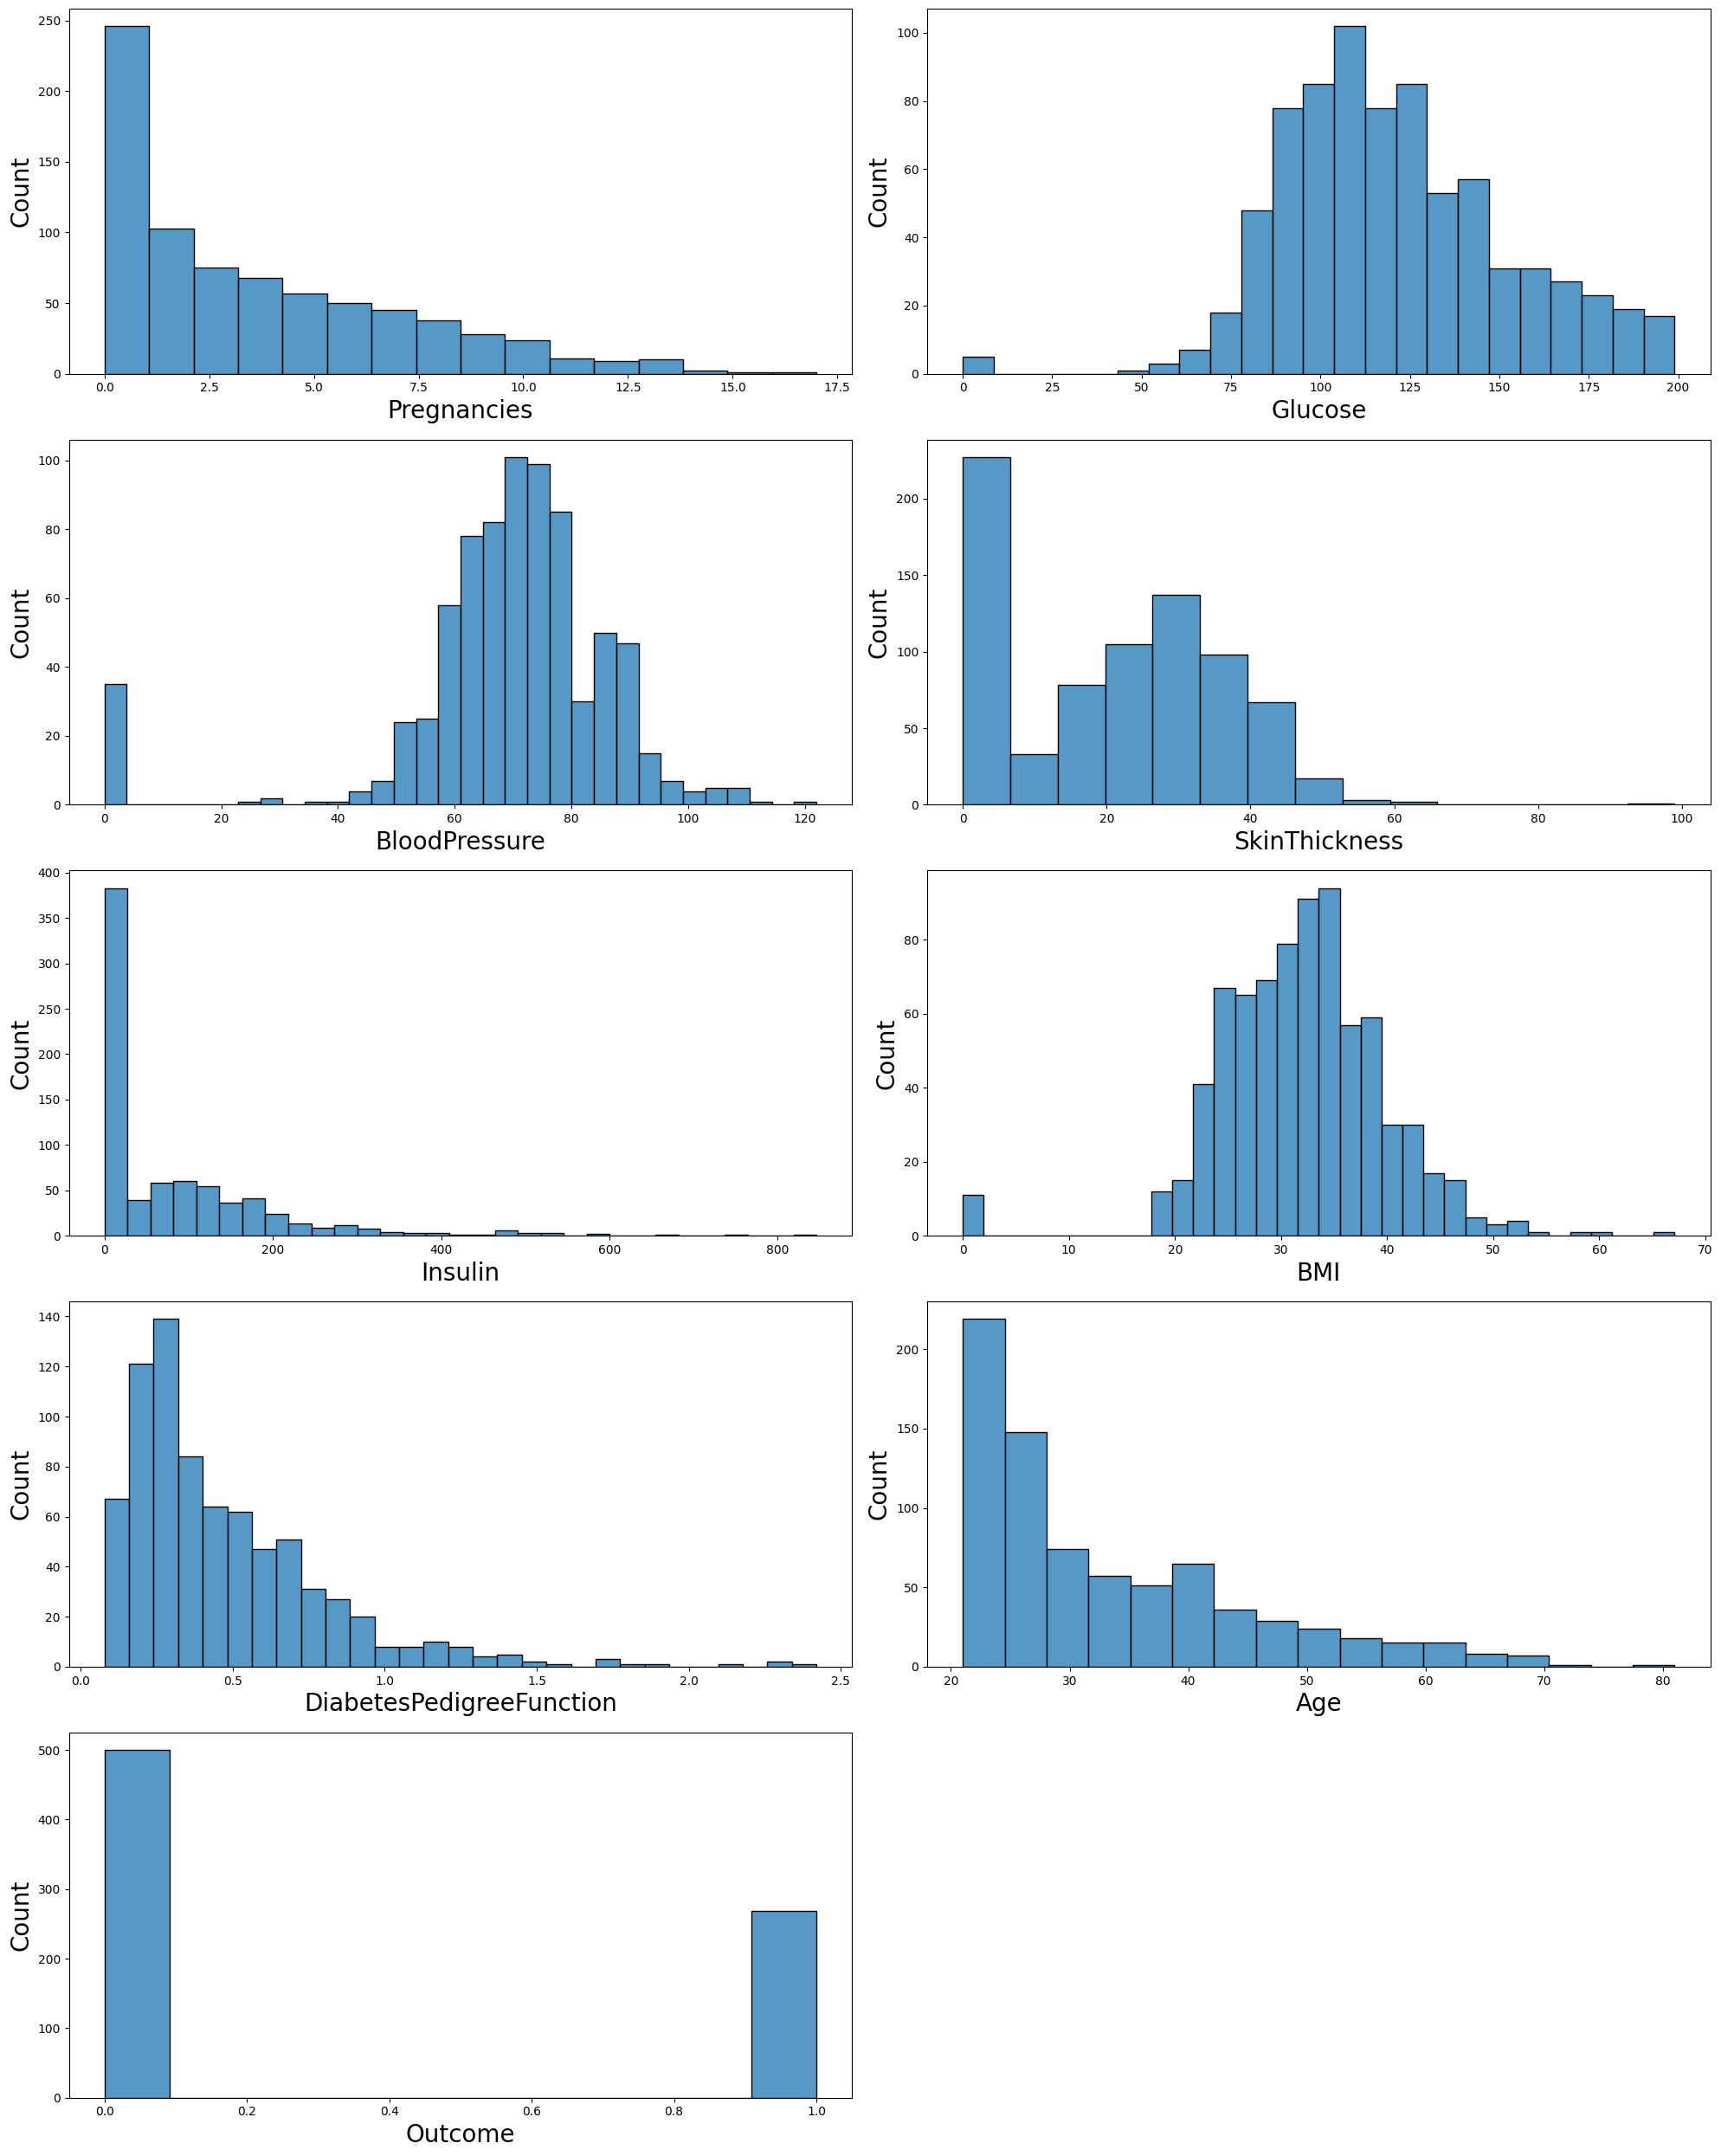

In [79]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(5,2,plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

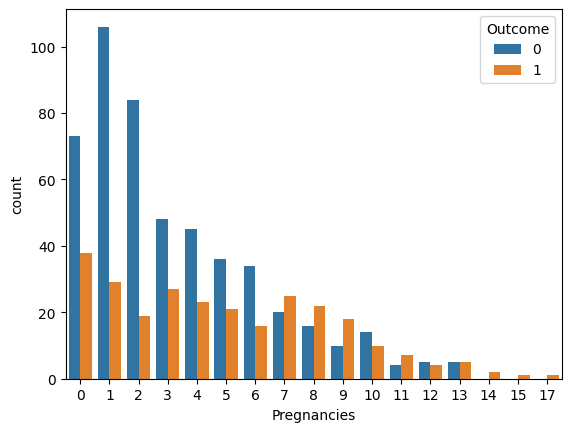

In [80]:
##Bivariate Analysis refers to plots between input variables and target variable.

## Analyzing how preganancies impact the patient with diabetes.
sns.countplot(x='Pregnancies',hue='Outcome',data=data)
plt.show()

<Axes: xlabel='Glucose', ylabel='Count'>

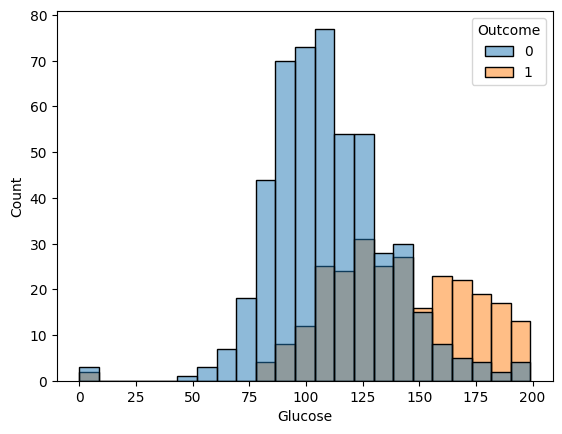

In [81]:
## Aanlyzing the relationship between diabetes and Glucose
sns.histplot(x='Glucose',hue='Outcome',data=data)

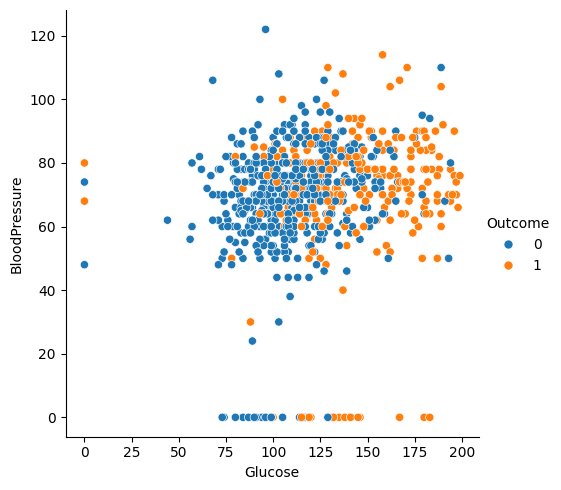

In [82]:
## Analyze Glucose with blood pressure

sns.relplot(x='Glucose',y='BloodPressure',hue='Outcome',data=data)
plt.show()

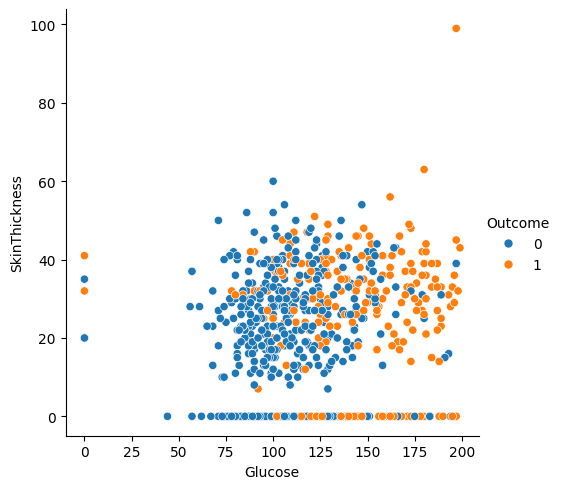

In [83]:
## Analyze Glucose with SkinThickness

sns.relplot(x='Glucose',y='SkinThickness',hue='Outcome',data=data)
plt.show()

<Axes: xlabel='BloodPressure', ylabel='Count'>

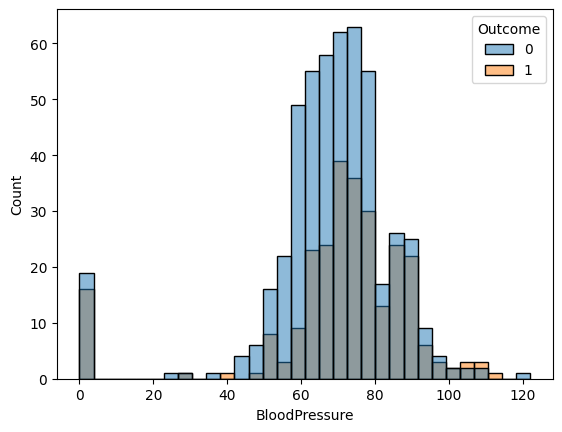

In [84]:
## Analyze relationship between BloodPressure and Outcome

sns.histplot(x='BloodPressure',hue='Outcome',data=data)

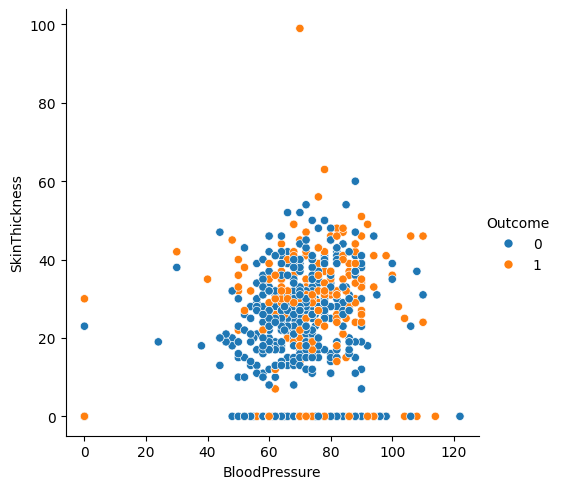

In [85]:
## Analyze BP with SkinThickness

sns.relplot(x='BloodPressure',y='SkinThickness',hue='Outcome',data=data)
plt.show()

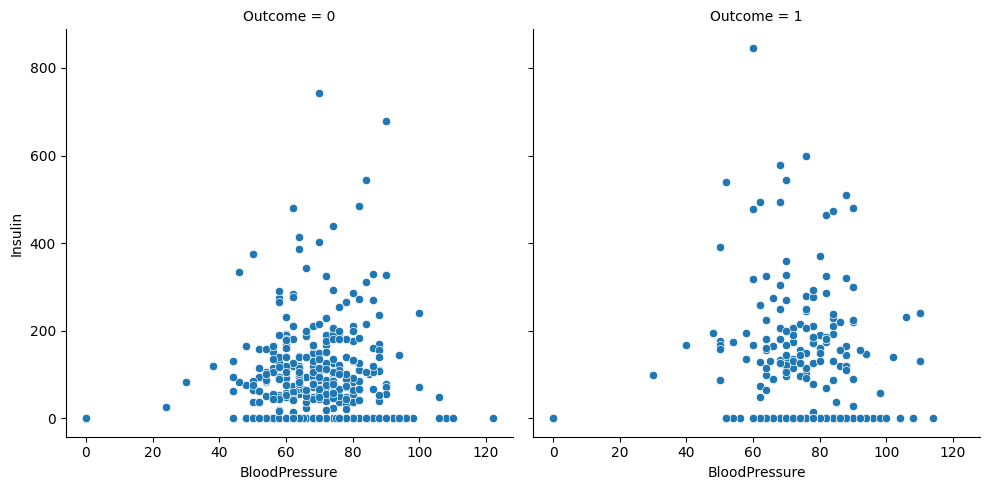

In [86]:
## Analyze BP with Insulin

sns.relplot(x='BloodPressure',y='Insulin',col='Outcome',data=data)
plt.show()

<Axes: xlabel='Insulin', ylabel='Count'>

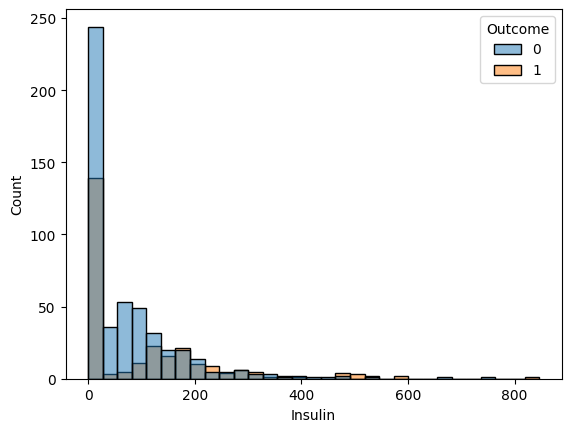

In [87]:
## Analyzing Insulin with target
sns.histplot(x='Insulin',hue='Outcome',data=data)

## Data Preprocessing and Feature Engineering.

In [88]:
#Step 1 Handling the missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [89]:
data['Glucose']

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64

In [90]:
## Step 2 Handling the corrupted data.
## In 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI' certain datapoints are zero.
data.Glucose.replace(0,np.median(data.Glucose),inplace=True)

#dataframe.colum.replace('Value to be replaced','By what value')


In [91]:
data.loc[data['BMI']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [92]:
data.BloodPressure.replace(0,np.median(data.BloodPressure),inplace=True)
data.SkinThickness.replace(0,np.median(data.SkinThickness),inplace=True)
data.Insulin.replace(0,np.median(data.Insulin),inplace=True)
data.BMI.replace(0,np.median(data.BMI),inplace=True)

In [93]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [94]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [95]:
## Step 5:-Scaling the data

from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()

dl=['Pregnancies','Outcome']

data1=sc.fit_transform(data.drop(dl,axis=1))


In [96]:
data1

array([[0.67096774, 0.48979592, 0.30434783, ..., 0.31492843, 0.23441503,
        0.48333333],
       [0.26451613, 0.42857143, 0.23913043, ..., 0.17177914, 0.11656704,
        0.16666667],
       [0.89677419, 0.40816327, 0.17391304, ..., 0.10429448, 0.25362938,
        0.18333333],
       ...,
       [0.49677419, 0.48979592, 0.17391304, ..., 0.16359918, 0.07130658,
        0.15      ],
       [0.52903226, 0.36734694, 0.17391304, ..., 0.24335378, 0.11571307,
        0.43333333],
       [0.31612903, 0.46938776, 0.26086957, ..., 0.24948875, 0.10119556,
        0.03333333]])

In [97]:
data1 
# Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age

array([[0.67096774, 0.48979592, 0.30434783, ..., 0.31492843, 0.23441503,
        0.48333333],
       [0.26451613, 0.42857143, 0.23913043, ..., 0.17177914, 0.11656704,
        0.16666667],
       [0.89677419, 0.40816327, 0.17391304, ..., 0.10429448, 0.25362938,
        0.18333333],
       ...,
       [0.49677419, 0.48979592, 0.17391304, ..., 0.16359918, 0.07130658,
        0.15      ],
       [0.52903226, 0.36734694, 0.17391304, ..., 0.24335378, 0.11571307,
        0.43333333],
       [0.31612903, 0.46938776, 0.26086957, ..., 0.24948875, 0.10119556,
        0.03333333]])

In [98]:
final_df = pd.DataFrame(data1, columns=['Glucose', 'BloodPressure',	'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [99]:
final_df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333
1,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667
2,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000


In [100]:
final_df['Pregnancies'] = data['Pregnancies']
final_df['Outcome'] = data['Outcome']

## Feature  Selection

In [101]:
final_df.corr()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
Glucose,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.128213,0.492782
BloodPressure,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.208615,0.165723
SkinThickness,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.032568,0.189065
Insulin,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,-0.055697,0.148457
BMI,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.021546,0.312249
DiabetesPedigreeFunction,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,-0.033523,0.173844
Age,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.544341,0.238356
Pregnancies,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,1.000000,0.221898
Outcome,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,0.221898,1.000000


<Axes: >

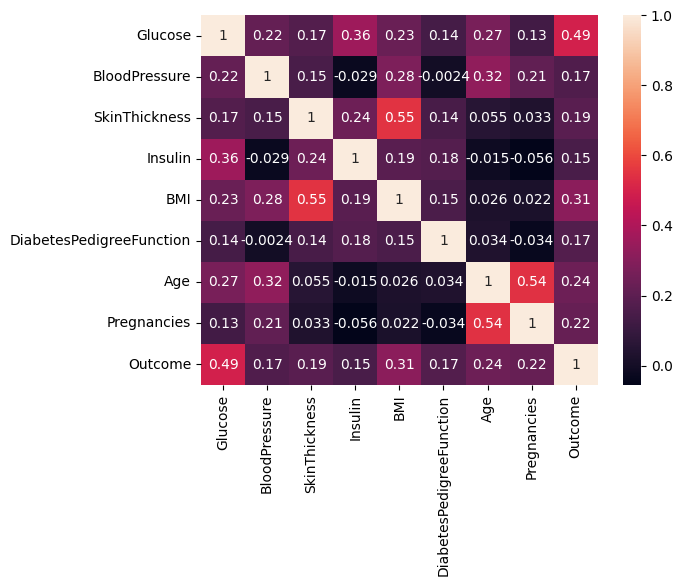

In [102]:
## No redundant fetaures
## We will check correlation
sns.heatmap(final_df.corr(),annot=True)

# So no correlation hence no features should be 

## Model Creation

In [103]:
## Step 1 Creating independent and dependent variable.

X =final_df.drop("Outcome", axis=1)
y =final_df.Outcome

In [104]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [105]:
## Step 2 Creating training and testing data.
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1, stratify=y)

In [106]:
y_test[:5]

118    0
132    1
3      0
693    1
654    0
Name: Outcome, dtype: int64

In [107]:
## Step 3 Model creation
from sklearn.linear_model import LogisticRegression

diabets_model=LogisticRegression()

diabets_model.fit(X_train,y_train)  ## training

LogisticRegression()

## Evaluation of Model

In [108]:
from sklearn.metrics import accuracy_score

In [109]:
train_pred = diabets_model.predict(X_train)

In [110]:
accuracy_score(y_train, train_pred)

0.7847222222222222

In [111]:
## Step 4 Prediction
y_pred=diabets_model.predict(X_test)

In [112]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [113]:
y_pred_prob=diabets_model.predict_proba(X_test)

In [114]:
y_pred_prob[:5]   

array([[0.87080082, 0.12919918],
       [0.3849625 , 0.6150375 ],
       [0.93502062, 0.06497938],
       [0.44067037, 0.55932963],
       [0.8619404 , 0.1380596 ]])

In [115]:
data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [116]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [117]:
accuracy_score(y_test, y_pred)

0.7552083333333334

In [118]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [119]:
y_train.value_counts()

Outcome
0    375
1    201
Name: count, dtype: int64

In [120]:
y_test.value_counts()

Outcome
0    125
1     67
Name: count, dtype: int64

In [121]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[114  11]
 [ 36  31]]


In [122]:
recall=recall_score(y_test,y_pred)
recall

0.4626865671641791

In [123]:
precision=precision_score(y_test,y_pred)
precision

0.7380952380952381

In [124]:
f1score=f1_score(y_test,y_pred)
f1score

0.5688073394495413

In [125]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       125
           1       0.74      0.46      0.57        67

    accuracy                           0.76       192
   macro avg       0.75      0.69      0.70       192
weighted avg       0.75      0.76      0.74       192



In [126]:
y_test.value_counts()

Outcome
0    125
1     67
Name: count, dtype: int64

In [127]:
accuracy_score(y_pred,y_test)

0.7552083333333334

In [130]:
from joblib import dump


# Save the model to a file
dump(diabets_model, "models/Diabetes_model.joblib")


['models/Diabetes_model.joblib']